In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, dct, idct, dst, idst, fftshift, fftfreq,rfft
import sympy as sp

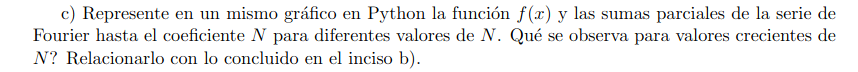

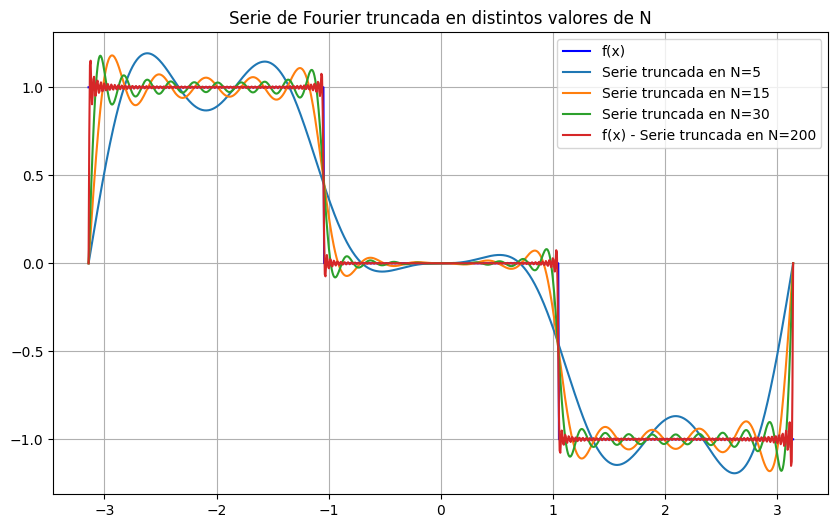

In [79]:
def f(x):
  res = []
  for i in range(len(x)):
    if x[i] <= -np.pi/3:
      res.append(1)
    elif x[i] <= np.pi/3:
      res.append(0)
    else:
      res.append(-1)
  return res

def S_N(x, N):
    serie = np.zeros_like(x)
    for n in range(1, N+1):
        serie += (2/(n * np.pi)) * (np.cos(n* np.pi) - np.cos(n * np.pi/3)) * np.sin(n*x)
    return serie

x = np.linspace(-np.pi, np.pi, 2**10)
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x)', color='blue')
plt.plot(x, S_N(x, 5), label='Serie truncada en N=5')
plt.plot(x, S_N(x, 15), label='Serie truncada en N=15')
plt.plot(x, S_N(x, 30), label='Serie truncada en N=30')
plt.plot(x, S_N(x, 200), label='f(x) - Serie truncada en N=200')
plt.legend()
plt.title('Serie de Fourier truncada en distintos valores de N')
plt.grid(True)
plt.show()

Mientras más grande es N, la serie se pega más a los valores correctos de la función, pero cuando nos acercamos a una discontinuidad, aparece el fenómeno de Gibbs, que da lugar a esos picos que quedan cada vez más pronunciados. En el b, dijimos que en los puntos en los que f es continua (teniendo en cuenta la hipótesis de que f es integrable), SNf(x0) -> f(x0), lo cual se puede observar más que nada lejos de las discontinuidades. Pero para -pi, -pi/3, pi/3 y pi, dijimos que SNf(x0) se tiene que parecer al promedio de los límites laterales, lo cual estaría pasando porque los picos "están espejados" con respecto al punto al que dijimos en el b que tenía que converger cada uno, observándose también que todas las series pasan por dichos valores medios, así que estamos perfecto. Más allá de eso, por el fenómeno de Gibbs, numéricamente no vamos a poder representar a f exactamente.

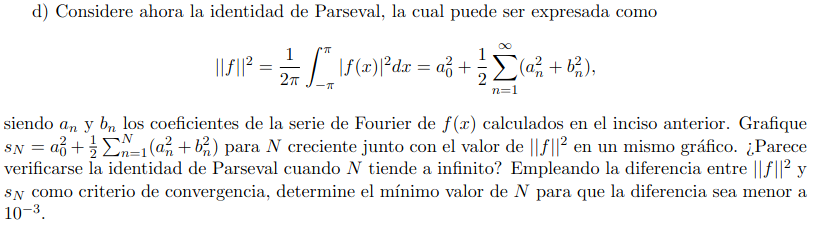

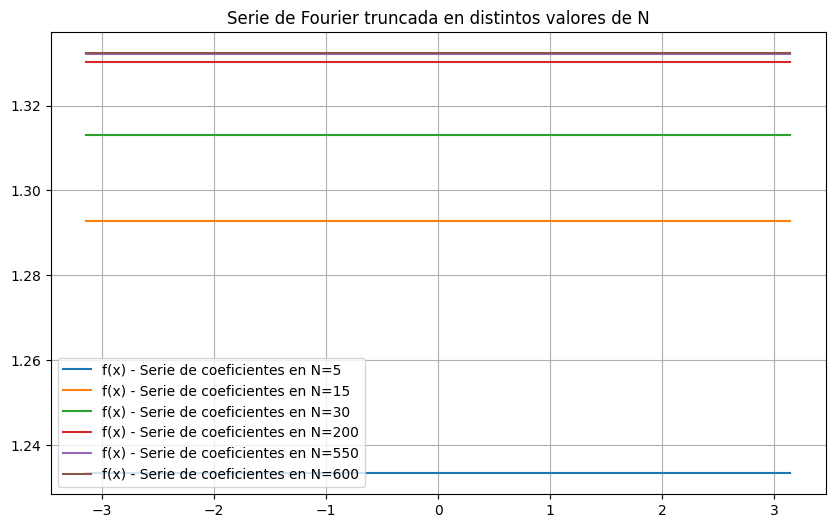

In [73]:
def S_N_coeficientes(x, N):
    serie = np.zeros_like(x)
    for n in range(1, N +1):
        serie += ((2/(n * np.pi)) * (np.cos(n* np.pi) - np.cos(n * np.pi/3)))**2
    return serie #  +a0**2 pero sabemos que como la función

x = np.linspace(-np.pi, np.pi, 2**10)
f_x = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, S_N_coeficientes(x, 5), label='f(x) - Serie de coeficientes en N=5')
plt.plot(x, S_N_coeficientes(x, 15), label='f(x) - Serie de coeficientes en N=15')
plt.plot(x, S_N_coeficientes(x, 30), label='f(x) - Serie de coeficientes en N=30')
plt.plot(x, S_N_coeficientes(x, 200), label='f(x) - Serie de coeficientes en N=200')
plt.plot(x, S_N_coeficientes(x, 550), label='f(x) - Serie de coeficientes en N=550')
plt.plot(x, S_N_coeficientes(x, 600), label='f(x) - Serie de coeficientes en N=600')
plt.legend()
plt.title('Serie de Fourier truncada en distintos valores de N')
plt.grid(True)
plt.show()

In [80]:
sigo_buscando = True
n_buscado = 0
i = 1
while sigo_buscando:
    Sn_coef = S_N_coeficientes(x, i)
    if np.allclose(Sn_coef, 4/3, atol=10**-3):  # Chequear que tan cerca estoy de 4/3
        sigo_buscando = False
        n_buscado = i
    i += 1
print(n_buscado)  # El minimo N que satisface la condición
print(S_N_coeficientes(x, n_buscado))

599
[1.33232012 1.33232012 1.33232012 ... 1.33232012 1.33232012 1.33232012]


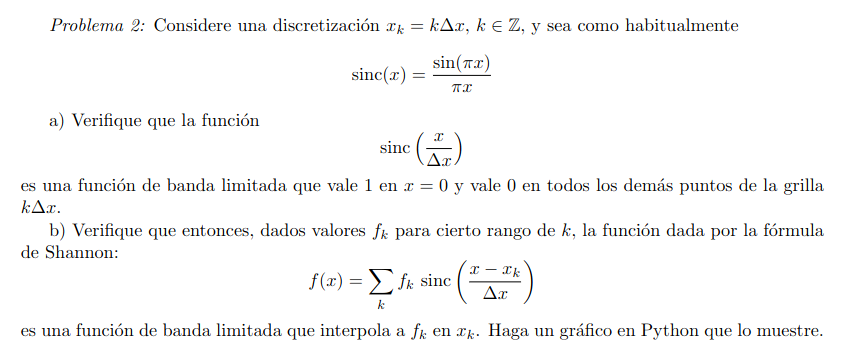

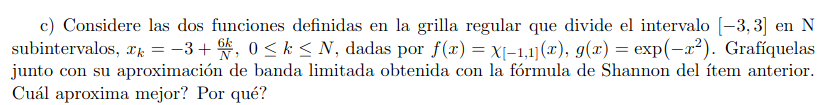

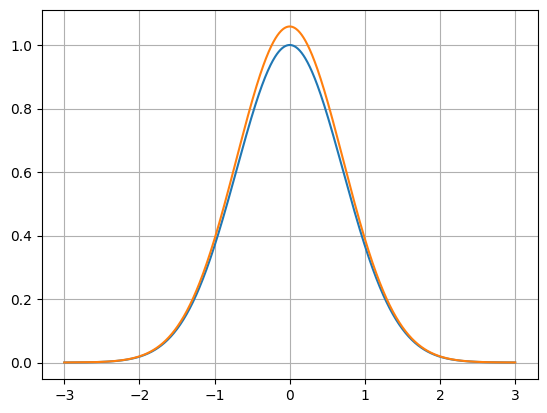

In [81]:
#Respuesta al b y al c tomando para reconstruir las funciones que nos pasaron

def reconstruction(x, tsampled, tsmooth, F):
    x_sinc = np.zeros(len(tsmooth))
    for n in range(0, len(tsampled)):
        x_sinc += x[n] * np.sinc(F * (tsmooth - tsampled[n]))
    return x_sinc

N = 128

def gauss(t, f):
    return np.exp(-f*t**2)

f = 1
tsampled = np.linspace(-3, 3, N)
tsmooth = np.linspace(-3, 3, 1000) #Por decir cualquier valor
ysampled = gauss(tsampled, f)
ysmooth = gauss(tsmooth, f)
yreconstruido = reconstruction(ysampled, tsampled, tsmooth, 20)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)
plt.grid()
plt.show()

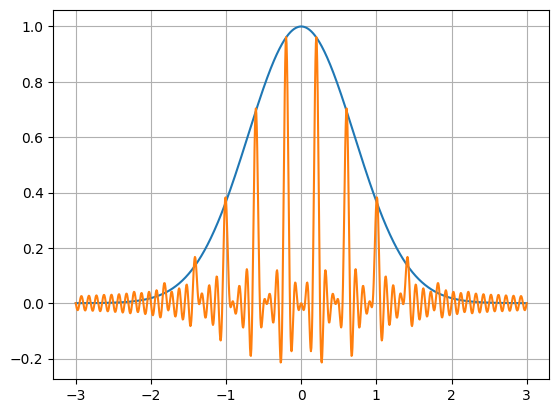

In [76]:
def reconstruction(x, tsampled, tsmooth, F):
    x_sinc = np.zeros(len(tsmooth))
    for n in range(0, len(tsampled)):
        x_sinc += x[n] * np.sinc(F * (tsmooth - tsampled[n]))
    return x_sinc

N = 16

def gauss(t, f):
    return np.exp(-f*t**2)

f = 1
tsampled = np.linspace(-3, 3, N)
tsmooth = np.linspace(-3, 3, 1000) #Por decir cualquier valor
ysampled = gauss(tsampled, f)
ysmooth = gauss(tsmooth, f)
yreconstruido = reconstruction(ysampled, tsampled, tsmooth, 20)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)
plt.grid()
plt.show()

Para mí con banda limitada tenía que quedar mejor por lo que vimos de Shannon, por eso la gaussiana necesita muchos N para acercarse a la función. En cambio, la característica debería aproximar mejor.

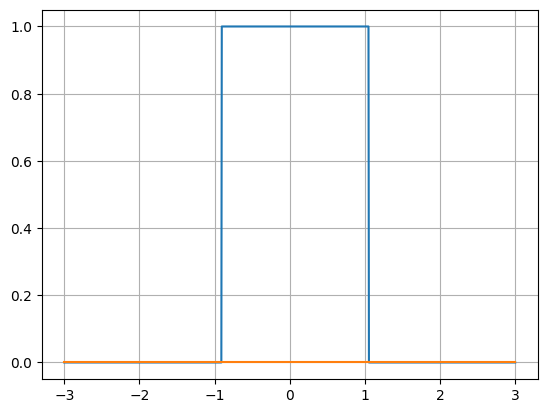

In [87]:
def caracteristica(t, f):
  res = []
  for i in range(len(t)):
    if x[i] < -1:
      res.append(0)
    elif x[i] >= 1:
      res.append(0)
    else:
      res.append(f)
  return res

f = 1
tsampled = np.linspace(-3, 3, N)
tsmooth = np.linspace(-3, 3, 1000) #Por decir cualquier valor
ysampled = caracteristica(tsampled, f)
ysmooth = caracteristica(tsmooth, f)
yreconstruido = reconstruction(ysampled, tsampled, tsmooth, 20)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)
plt.grid()
plt.show()

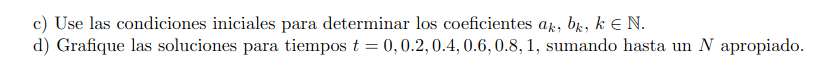

In [78]:
#Idea del código si andara bien sacar los coeficientes

def S_N(x, t, N):
    for i in range(len(t)):
      serie = np.zeros_like(x)
      for n in range(1, N+1):
          serie += (2/(n * np.pi)) * (np.cos(n* np.pi) - np.cos(n * np.pi/3)) * np.sin(n*x)

      plt.plot(x, serie)
      plt.show()
    return

tiempos = [0.2, 0.4, 0.6, 0.8, 1]

def u(x, t):
  return ak cos + bk sen

print(S_N(x, tiempos, N)

SyntaxError: invalid syntax (<ipython-input-78-ecbc42533bdc>, line 16)